# Predicting Gender from OkCupid Profiles
*By [Sergio Avalos S.](https://github.com/srg2912)*

## 1. Introduction

In online dating platforms, user demographics play a crucial role in improving matchmaking algorithms and personalizing user experiences. One key demographic attribute is gender, which influences profile visibility, recommendations, and overall platform engagement. This project aims to build a machine learning model that predicts a user's gender based on various personal attributes from their OkCupid profile. By leveraging structured data such as age, body type, and lifestyle habits, this project seeks to determine how accurately gender can be inferred from available profile information.

### 1.1. Scoping

#### Project Goals

The primary research question that will be answered is whether an OkCupid user's gender can be predicted using other variables from their profiles. This project is important since understanding user demographics can help improve recommendations and personalize user experiences.

#### Data

The project has one dataset provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user, and the columns contain responses to their user profiles, including multiple-choice and short-answer questions. The target variable for prediction is `sex`, which can take values "m" or "f".

The features selected for this analysis include:
- **Age**
- **Body Type**
- **Diet, Drinks, Smokes, Drugs**
- **Education & Job**
- **Height**
- **Religion**
- **Orientation**

Some columns have missing values, and appropriate preprocessing techniques will be used to handle them.

#### Analysis

This solution will use descriptive statistics and data visualization to explore the distribution, count, and relationships between variables. Since the goal of the project is to make predictions on the user's gender, classification algorithms from the supervised learning family of machine learning models will be implemented. Potential models to explore include:
- Logistic Regression
- Decision Trees
- Random Forest
- Support Vector Machines

Feature engineering, encoding categorical variables, and handling missing data will also be key steps in preparing the dataset for modeling.

#### Evaluation

The project will conclude with the evaluation of the machine learning model selected using a validation dataset. The output of the predictions can be assessed using a confusion matrix, and metrics such as accuracy, precision, recall, and F1 scores. The final model performance will determine how well gender can be predicted based on the chosen features.

## 2. Data Preparation and Exploration

### 2.1. Importing the Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('profiles.csv', encoding='utf-8')
print(df.head())


   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

#### Data characteristics

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to:

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

For this project's purposes, we will be dropping the essay columns.

In [2]:
df = df.drop(columns=['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'])
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education            ethnicity  height  income  \
0      working on college/university         asian, white    75.0      -1   
1              working on space camp                white    70.0   80000   
2     graduated from masters program                  NaN    68.0      -1   
3      working on college/university                white    71.0   20000   
4  graduated from college/university  asian, black, other    66.0      -1   

                           job  ...                         location  \
0               transportation  ...  south san francisco, california

### 2.2. Data Cleaning and Wrangling

We notice that the features `sign`, `religion`, `ethnicity` and `speaks` could be simplified by getting just the first word of the sentence:

In [3]:
df.sign = df.sign.str.split().str.get(0)
df.religion = df.religion.str.split().str.get(0)
df.ethnicity = df.ethnicity.str.split().str.get(0)
df.ethnicity = df.ethnicity.str.replace('[,]', '', regex=True)
df.speaks = df.speaks.str.split().str.get(0)
df.speaks = df.speaks.str.replace('[,]', '', regex=True)
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education ethnicity  height  income  \
0      working on college/university     asian    75.0      -1   
1              working on space camp     white    70.0   80000   
2     graduated from masters program       NaN    68.0      -1   
3      working on college/university     white    71.0   20000   
4  graduated from college/university     asian    66.0      -1   

                           job  ...                         location  \
0               transportation  ...  south san francisco, california   
1         hospitality / travel  ...              oakland, cali

Our location feature mentions both city and state, for this project we will only use the state:

In [4]:
df["location"] = df["location"].apply(lambda x: x.split(", ")[-1] if pd.notnull(x) else x)
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education ethnicity  height  income  \
0      working on college/university     asian    75.0      -1   
1              working on space camp     white    70.0   80000   
2     graduated from masters program       NaN    68.0      -1   
3      working on college/university     white    71.0   20000   
4  graduated from college/university     asian    66.0      -1   

                           job  ...    location  \
0               transportation  ...  california   
1         hospitality / travel  ...  california   
2                          NaN  ...  california   
3 

For this project, the features `last_online`, `offspring` and `pets` won't be considerated neither.

In [5]:
df = df.drop(columns=['last_online', 'offspring', 'pets'])
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education ethnicity  height  income  \
0      working on college/university     asian    75.0      -1   
1              working on space camp     white    70.0   80000   
2     graduated from masters program       NaN    68.0      -1   
3      working on college/university     white    71.0   20000   
4  graduated from college/university     asian    66.0      -1   

                           job    location orientation     religion sex  \
0               transportation  california    straight  agnosticism   m   
1         hospitality / travel  california    straight  

From the method .head() we can observe that the `income` has values equal to -1, which doesn't make sense for what the feature represents, meaning that these indicate missing values. To get an idea of the distribution of these values, we can plot a histogram of the feature:

Missing income values:  48442
Total values:  59946
Percentage of missing income values:  80.80939512227671 %


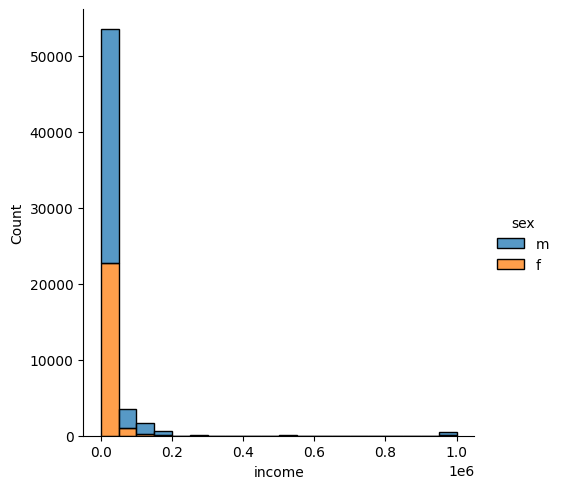

<Figure size 640x480 with 0 Axes>

In [6]:
print('Missing income values: ', len(df[df.income == -1]))
print('Total values: ', len(df))
print('Percentage of missing income values: ', len(df[df.income == -1]) * 100 / len(df), '%')

sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack")
plt.show()
plt.clf()

Since more than 80% of the income values are missing, we will have to drop this feature as well.

In [7]:
df = df.drop(columns=['income'])
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education ethnicity  height  \
0      working on college/university     asian    75.0   
1              working on space camp     white    70.0   
2     graduated from masters program       NaN    68.0   
3      working on college/university     white    71.0   
4  graduated from college/university     asian    66.0   

                           job    location orientation     religion sex  \
0               transportation  california    straight  agnosticism   m   
1         hospitality / travel  california    straight  agnosticism   m   
2                          Na

We will now inspect our other numerical variables in order to make sure we don't have any more missing values or outliers.

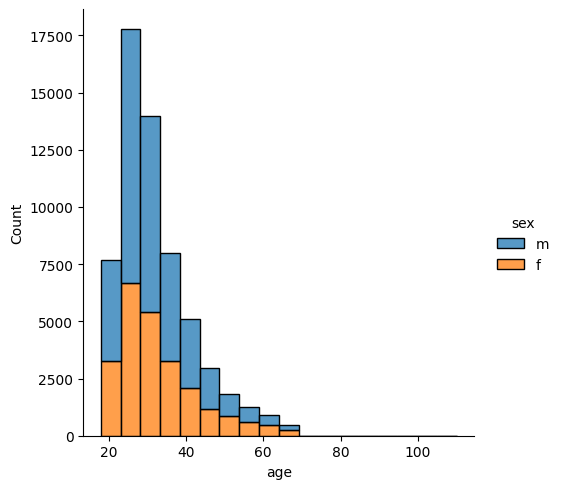

People that claim to be over 100:  2
People that claim to be over 68:  33


<Figure size 640x480 with 0 Axes>

In [8]:
sns.displot(data=df, x="age",hue="sex", kind="hist", binwidth = 5, multiple = "stack")
plt.show()
plt.clf()

print('People that claim to be over 100: ', len(df[df.age > 100]))
print('People that claim to be over 68: ', len(df[df.age > 68]))

Since in the feature `age` we have to people that claim to be over 100 years old, we can attribute this to be a mistake, therefore we will drop these values. In total, there are 33 people that claim to be over the age of 68, while this could be true, in order to avoid skewness in our data, all of these values will be dropped.

In [9]:
df = df[df.age <= 68]

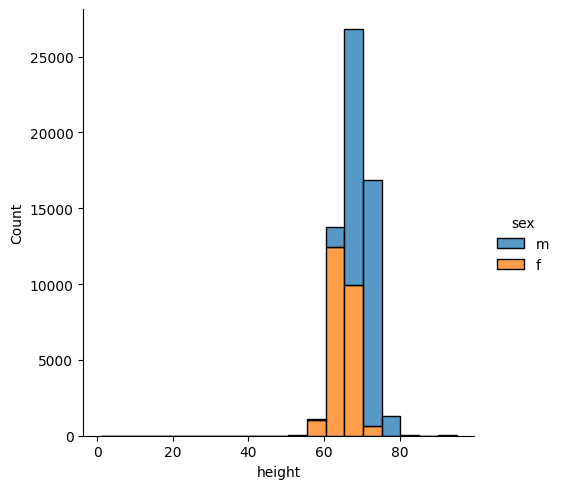

People tha claim to be over 80 in:  77
People tha claim to be under 55 in:  39


<Figure size 640x480 with 0 Axes>

In [10]:
sns.displot(data=df, x="height",hue="sex", kind="hist", binwidth = 5, multiple = "stack")
plt.show()
plt.clf()

print('People tha claim to be over 80 in: ', len(df[df.height > 80]))
print('People tha claim to be under 55 in: ', len(df[df.height < 55]))

In the feature `height` we have 77 people that claim to be over 80 in (203.2 cm) and 39 people that claim to be under 55 in (139.7 cm), while this could be true, omce again, we will eliminate these values to avoid skewness. 

In [11]:
df = df[(df.height >= 55) & (df.height <= 80)]

Now, we will plot the rest of our variables using a for loop.

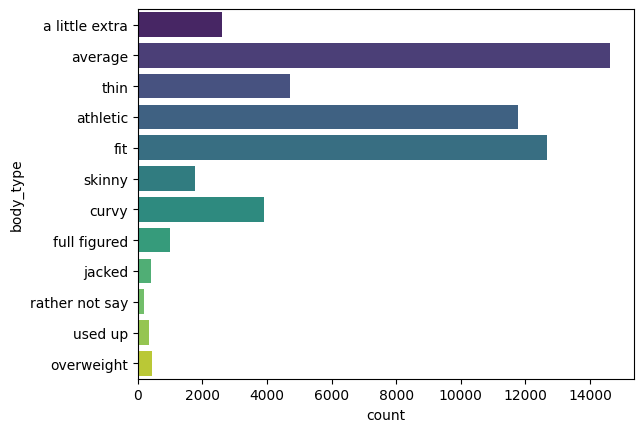

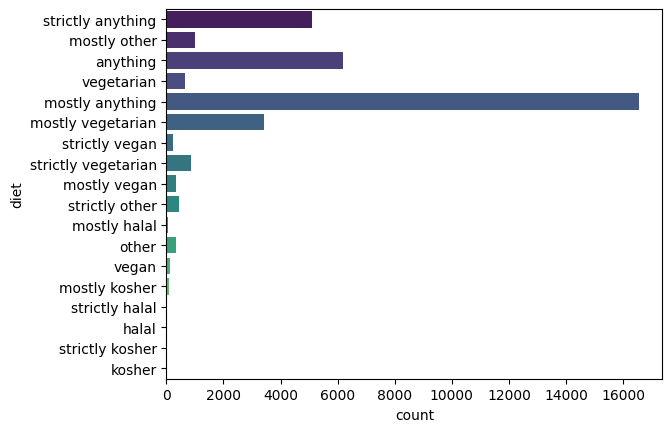

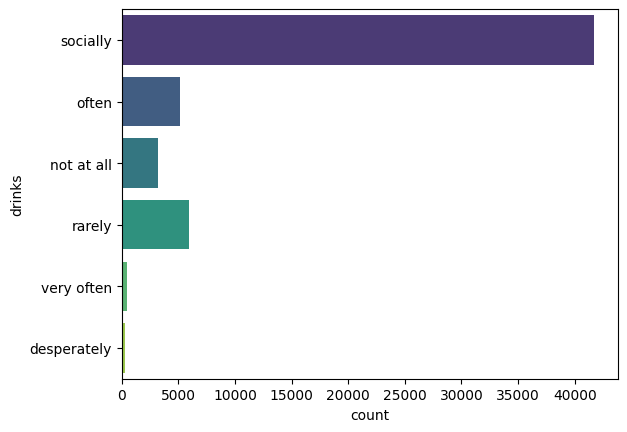

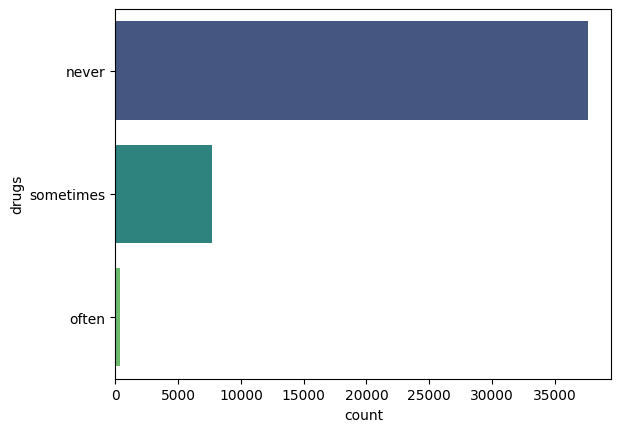

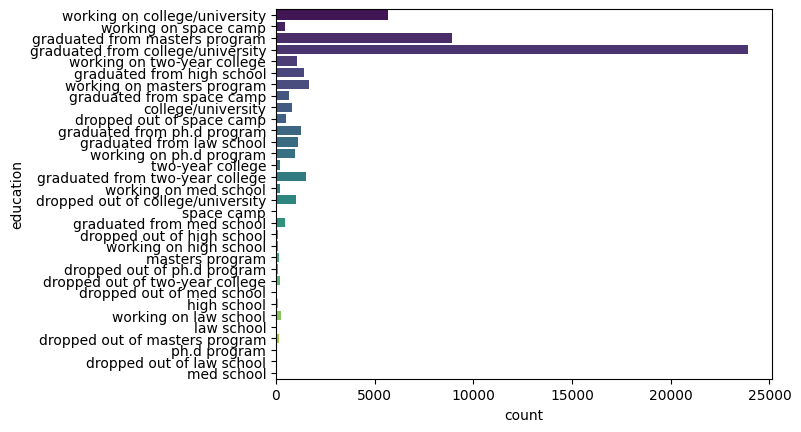

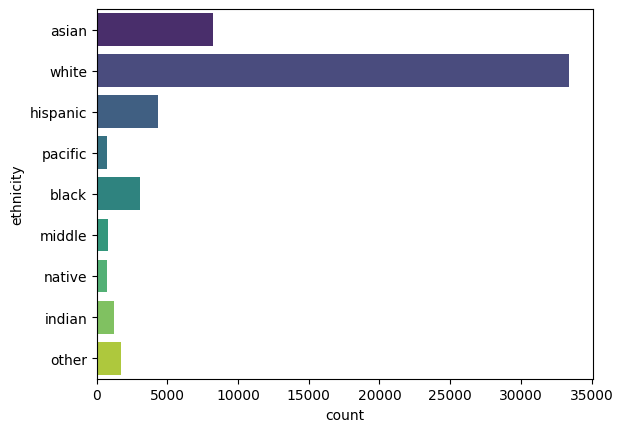

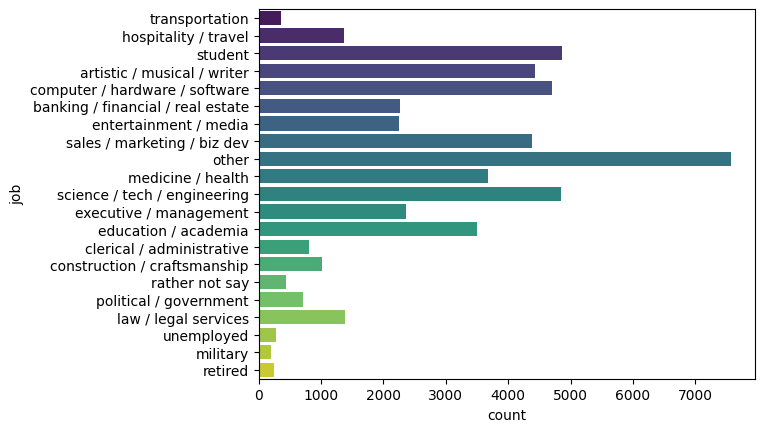

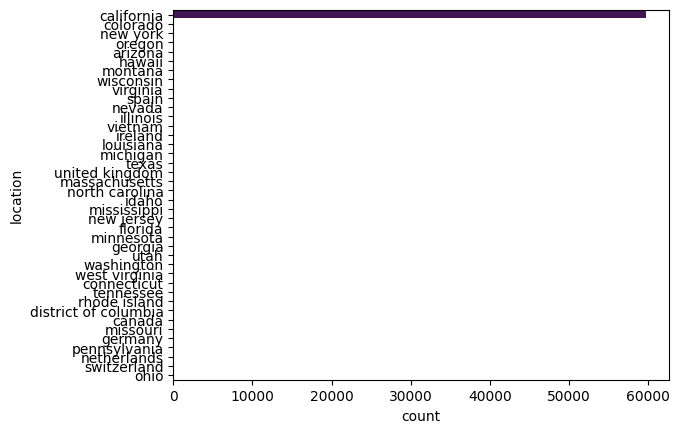

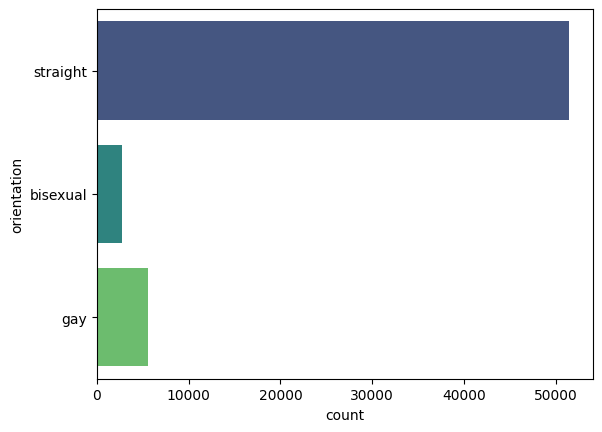

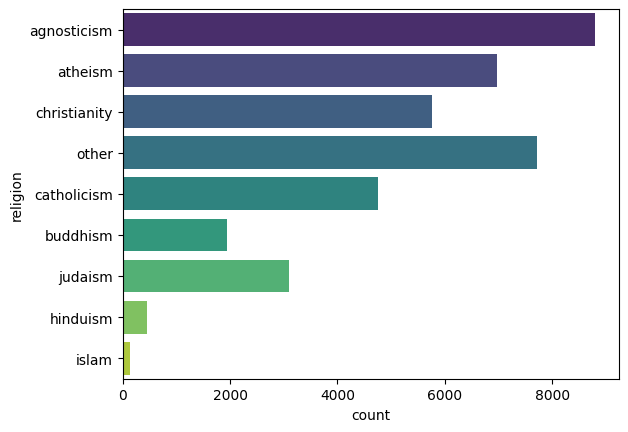

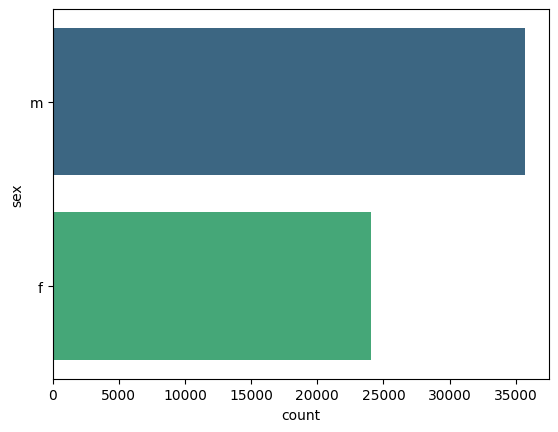

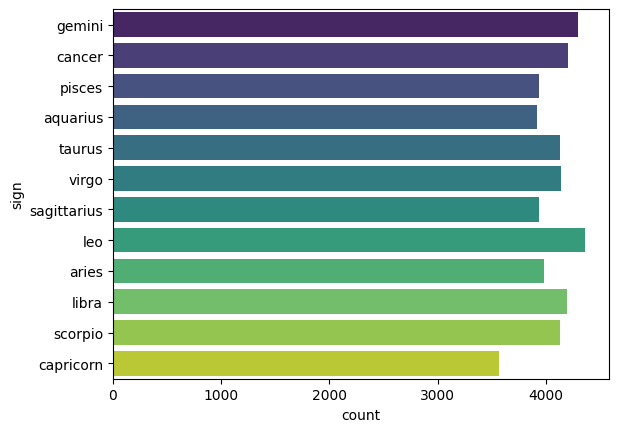

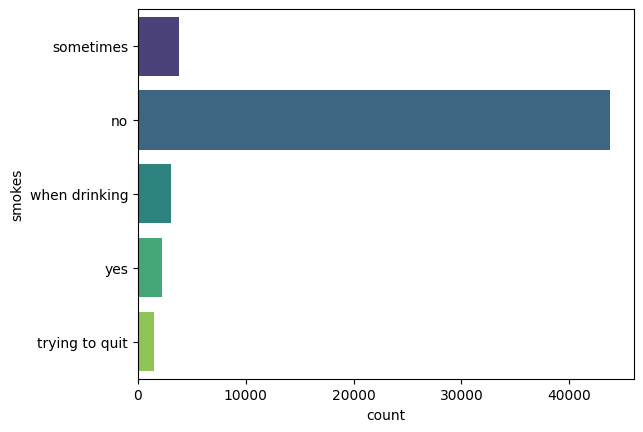

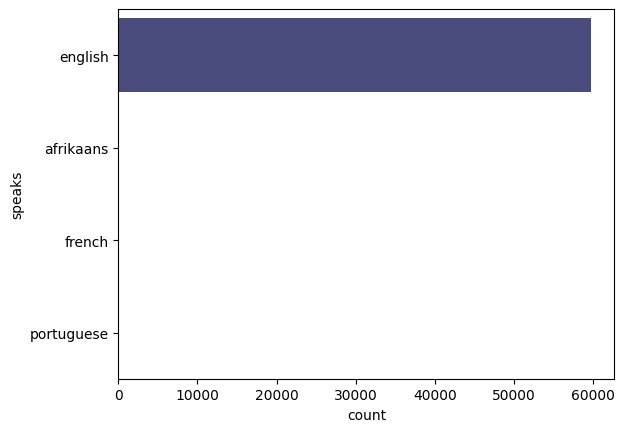

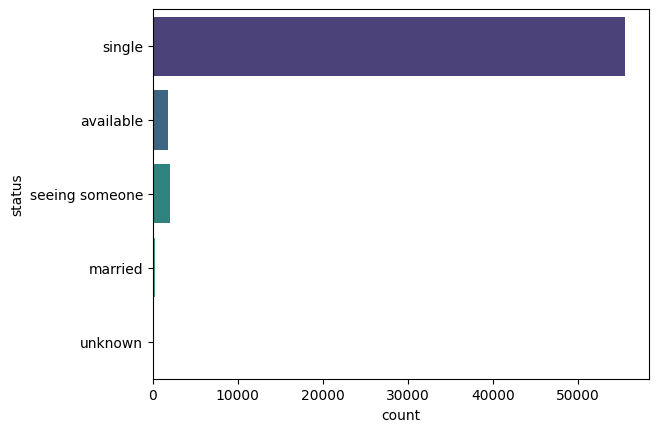

<Figure size 640x480 with 0 Axes>

In [12]:
for column in df.columns:
    if column not in ['age', 'height']:
        sns.countplot(data=df, y=column, hue=column, legend=False, palette=sns.color_palette("viridis", n_colors=df[column].nunique()))
        plt.show()
        plt.clf()

From these plots we can observe that:
1. Most people are from California, given that most of there's so little data about other locations, this feature will be removed.
2. Most people speak English as their primary language, so this feature will be removed for not having enough data about the rest as well.
3. Some people have their status as unknown, this is a clear mistake. While the most probable option is that they are also single, given that is such a short amount of data, these will be removed.
4. The status married is so rare that could affect the performance of our models later on, so these values will be ignored.
5. The values of the feature smokes could be grouped so we only have yes and no.
6. There are several other features that can be further simplified.

In [13]:
df = df.drop(columns=['location', 'speaks'])
df = df[(df.status != 'unknown') & (df.status != 'married')]
df['smokes'] = df['smokes'].map(lambda x: 'yes' if x != 'no' else 'no')

In [14]:
diet_mapping = {
    'mostly anything': 'anything', 'anything': 'anything', 'strictly anything': 'anything',
    'mostly vegetarian': 'vegetarian', 'vegetarian': 'vegetarian', 'strictly vegetarian': 'vegetarian',
    'mostly vegan': 'vegan', 'vegan': 'vegan', 'strictly vegan': 'vegan',
    'mostly other': 'other', 'other': 'other', 'strictly other': 'other',
    'mostly kosher': 'kosher', 'kosher': 'kosher', 'strictly kosher': 'kosher',
    'mostly halal': 'halal', 'halal': 'halal', 'strictly halal': 'halal'
}

df['diet'] = df['diet'].map(diet_mapping)

In [15]:
body_type_mapping = {
    'thin': 'slim', 'skinny': 'slim',
    'average': 'average',
    'fit': 'athletic', 'athletic': 'athletic', 'jacked': 'athletic',
    'curvy': 'curvy_extra', 'a little extra': 'curvy_extra', 'full figured': 'curvy_extra',
    'overweight': 'overweight',
    'used up': 'other', 'rather not say': 'other'
}

df['body_type'] = df['body_type'].map(body_type_mapping)


In [16]:
education_mapping = {
    'high school': 'high_school', 'working on high school': 'high_school', 'dropped out of high school': 'high_school',
    'graduated from two-year college': 'two_year_college', 'working on two-year college': 'two_year_college',
    'dropped out of two-year college': 'two_year_college', 'two-year college': 'two_year_college',
    'graduated from college/university': 'college_university', 'working on college/university': 'college_university',
    'dropped out of college/university': 'college_university', 'college/university': 'college_university',
    'graduated from masters program': 'masters', 'working on masters program': 'masters',
    'dropped out of masters program': 'masters', 'masters program': 'masters',
    'graduated from ph.d program': 'phd_professional', 'working on ph.d program': 'phd_professional',
    'dropped out of ph.d program': 'phd_professional', 'ph.d program': 'phd_professional',
    'graduated from law school': 'phd_professional', 'working on law school': 'phd_professional',
    'dropped out of law school': 'phd_professional', 'law school': 'phd_professional',
    'graduated from med school': 'phd_professional', 'working on med school': 'phd_professional',
    'dropped out of med school': 'phd_professional', 'med school': 'phd_professional',
    'graduated from space camp': 'space_camp', 'working on space camp': 'space_camp',
    'dropped out of space camp': 'space_camp', 'space camp': 'space_camp'
}

df['education'] = df['education'].map(education_mapping)


In [17]:
job_mapping = {
    'computer / hardware / software': 'stem', 'science / tech / engineering': 'stem',
    'artistic / musical / writer': 'creative_media', 'entertainment / media': 'creative_media',
    'sales / marketing / biz dev': 'business_finance', 'banking / financial / real estate': 'business_finance',
    'executive / management': 'business_finance',
    'medicine / health': 'healthcare_law', 'law / legal services': 'healthcare_law',
    'education / academia': 'education_government', 'political / government': 'education_government',
    'hospitality / travel': 'trades_services', 'construction / craftsmanship': 'trades_services',
    'clerical / administrative': 'trades_services', 'transportation': 'trades_services',
    'unemployed': 'unemployed_retired', 'retired': 'unemployed_retired',
    'rather not say': 'other_unknown', 'other': 'other_unknown',
    'military': 'military',
    'student': 'student'
}

df['job'] = df['job'].map(job_mapping)


Now we can drop the rest of null values to have a completely clean dataset.

In [18]:
new_df = df.dropna()
print(new_df.head())

    age    body_type      diet      drinks      drugs           education  \
0    22  curvy_extra  anything    socially      never  college_university   
1    35      average     other       often  sometimes          space_camp   
7    31      average  anything    socially      never  college_university   
9    37     athletic  anything  not at all      never    two_year_college   
11   28      average  anything    socially      never  college_university   

   ethnicity  height               job orientation      religion sex  \
0      asian    75.0   trades_services    straight   agnosticism   m   
1      white    70.0   trades_services    straight   agnosticism   m   
7      white    65.0    creative_media    straight  christianity   f   
9      white    65.0           student    straight       atheism   m   
11     white    72.0  business_finance    straight  christianity   m   

           sign smokes          status  
0        gemini    yes          single  
1        cancer     no

We can also show some summary statistics for our data:

In [19]:
print(new_df.describe())
for column in new_df.columns:
    if column not in ['age', 'height']:
        print(f'\nValue counts for {column}: ')
        print(new_df[column].value_counts())
print(new_df.shape)

                age        height
count  14478.000000  14478.000000
mean      32.788023     68.248791
std       10.144015      3.846002
min       18.000000     55.000000
25%       26.000000     65.000000
50%       30.000000     68.000000
75%       38.000000     71.000000
max       68.000000     80.000000

Value counts for body_type: 
body_type
athletic       6266
average        3907
curvy_extra    2349
slim           1669
other           149
overweight      138
Name: count, dtype: int64

Value counts for diet: 
diet
anything      11361
vegetarian     1952
other           798
vegan           276
kosher           60
halal            31
Name: count, dtype: int64

Value counts for drinks: 
drinks
socially       10275
rarely          1669
often           1252
not at all      1049
very often       142
desperately       91
Name: count, dtype: int64

Value counts for drugs: 
drugs
never        11504
sometimes     2825
often          149
Name: count, dtype: int64

Value counts for education: 
e

### 2.3. Data Preprocessing

Now that we have a clean dataset, we will have to transform it's values into new ones that our models will be able to accept. This will be done through the methods of One-Hot encoding and Standardization.

In [20]:
columns = ['age', 'body_type', 'diet', 'drinks', 'smokes', 'drugs', 'education', 'job', 'height', 'religion', 'orientation', 'sex']
data = new_df[columns]

In [21]:
from sklearn.preprocessing import StandardScaler

num_features = ['age', 'height']
cat_features = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'religion', 'orientation']

data.loc[:, 'sex'] = data['sex'].map({'m': 0, 'f': 1})
data.loc[:, 'smokes'] = data['smokes'].map({'no': 0, 'yes': 1})

scaler = StandardScaler()
for num in num_features:
    data.loc[:, num] = scaler.fit_transform(data[[num]])

cat_data = pd.get_dummies(data[cat_features], drop_first=True).astype(int)
data_preprocessed = pd.concat([data[num_features + ['sex', 'smokes']], cat_data], axis=1)

print(data_preprocessed.head())


         age    height sex smokes  body_type_average  body_type_curvy_extra  \
0  -1.063523  1.755444   0      1                  0                      1   
1   0.218065  0.455348   0      0                  1                      0   
7  -0.176270 -0.844748   1      0                  1                      0   
9   0.415232 -0.844748   0      0                  0                      0   
11 -0.472021  0.975387   0      0                  1                      0   

    body_type_other  body_type_overweight  body_type_slim  diet_halal  ...  \
0                 0                     0               0           0  ...   
1                 0                     0               0           0  ...   
7                 0                     0               0           0  ...   
9                 0                     0               0           0  ...   
11                0                     0               0           0  ...   

    religion_atheism  religion_buddhism  religion_cathol

C:\Users\sergi\AppData\Local\Temp\ipykernel_8204\4048868718.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.06352322  0.21806485 -0.17626994 ... -0.86635582  0.90815074
 -0.57060473]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, num] = scaler.fit_transform(data[[num]])


We can now assign values for our independent variable (X) and our target variable (y):

In [22]:
X = data_preprocessed.drop(columns= 'sex')
y = data_preprocessed['sex']
y = y.astype(int)

It's always a good practice to look for multicolinearity in our data, therefore we plot the correlation matrix using a heatmap:

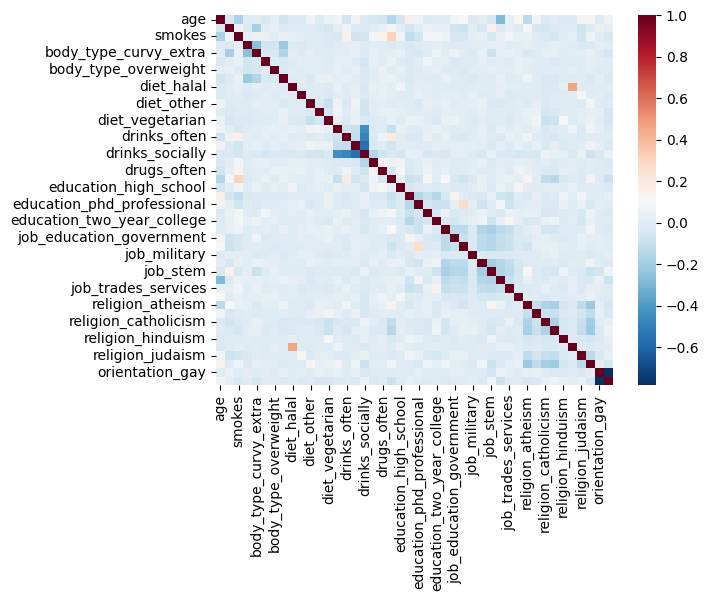

<Figure size 640x480 with 0 Axes>

In [23]:
corr_matrix = X.corr(method='pearson')
sns.heatmap(corr_matrix, cmap='RdBu_r')
plt.show()
plt.clf()

Now that we've made sure that our data is ready for modelling, we finally can split our data for proper training and testing:

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## 3. Modelling

### 3.1. Logistic Regression

In this section we will implement an optimized version of logistic regression using BayesSearchCV.

In [25]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression

lr_opt = BayesSearchCV(
    LogisticRegression(solver='liblinear', random_state=1),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'penalty': ['l1', 'l2'],
    },
    n_iter=32,
    cv=5
)

lr_opt.fit(X_train, y_train)

print("Best parameters:", lr_opt.best_params_)
print("Validation score:", lr_opt.best_score_)
print("Test score:", lr_opt.score(X_test, y_test))

Best parameters: OrderedDict({'C': 0.7010828232480305, 'penalty': 'l1'})
Validation score: 0.8647896862046167
Test score: 0.8756906077348067


Now we print the classification report to take a look at our model's scores:

In [26]:
from sklearn.metrics import classification_report

y_pred = lr_opt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1704
           1       0.87      0.82      0.84      1192

    accuracy                           0.88      2896
   macro avg       0.87      0.87      0.87      2896
weighted avg       0.88      0.88      0.88      2896



Finally, we plot the confussion matrix using a heatmap:

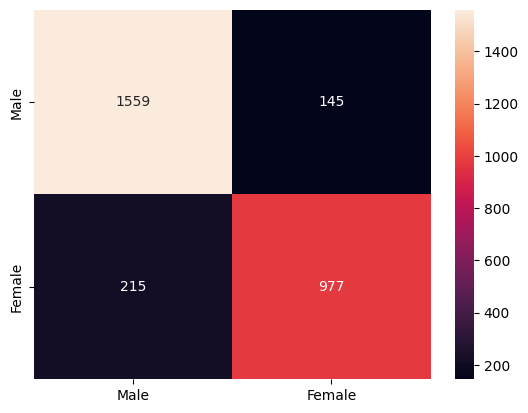

<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.metrics import confusion_matrix 

def plot_cm(y_test, y_pred):
    cart_cm = confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");
    ax.xaxis.set_ticklabels(['Male', 'Female']); 
    ax.yaxis.set_ticklabels(['Male', 'Female']);
    plt.show()
    plt.clf()

plot_cm(y_test, y_pred)

### 3.2. Decision Tree

For this section, we will use a decision tree instead to see if we can achieve better results. Like in the previous section we will first create and fit the model, then we will print the classification report and lastly we will plot the confussion matrix.

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_opt = BayesSearchCV(
    DecisionTreeClassifier(random_state=1),
    {
        'max_depth': (1, 50),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20),
        'max_features': ['sqrt', 'log2', None],
        'criterion': ['gini', 'entropy']
    },
    n_iter=32,
    cv=5
)

dt_opt.fit(X_train, y_train)

print("Best parameters:", dt_opt.best_params_)
print("Validation score:", dt_opt.best_score_)
print("Test score:", dt_opt.score(X_test, y_test))

Best parameters: OrderedDict({'criterion': 'gini', 'max_depth': 45, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 20})
Validation score: 0.8484713870520736
Test score: 0.8515193370165746


In [29]:
y_pred = dt_opt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1704
           1       0.85      0.78      0.81      1192

    accuracy                           0.85      2896
   macro avg       0.85      0.84      0.84      2896
weighted avg       0.85      0.85      0.85      2896



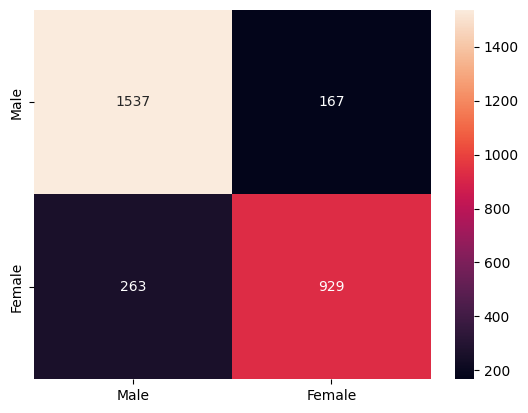

<Figure size 640x480 with 0 Axes>

In [30]:
plot_cm(y_test, y_pred)

### 3.3. Random Forest

For this section, we will use a random forest classifier instead to see if we can achieve better results. Like in the previous section we will first create and fit the model, then we will print the classification report and lastly we will plot the confussion matrix.

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc_opt = BayesSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=1),
    {
        'n_estimators': (50, 500),
        'max_depth': (5, 50),
        'min_samples_split': (2, 20),
        'min_samples_leaf': (1, 20),
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy']
    },
    n_iter=32,
    cv=5
)

rfc_opt.fit(X_train, y_train)

print("Best parameters:", rfc_opt.best_params_)
print("Validation score:", rfc_opt.best_score_)
print("Test score:", rfc_opt.score(X_test, y_test))

Best parameters: OrderedDict({'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 376})
Validation score: 0.859955029395256
Test score: 0.8705110497237569


In [32]:
y_pred = rfc_opt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1704
           1       0.87      0.81      0.84      1192

    accuracy                           0.87      2896
   macro avg       0.87      0.86      0.86      2896
weighted avg       0.87      0.87      0.87      2896



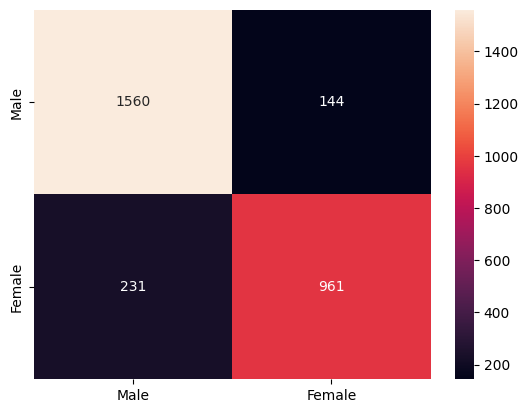

<Figure size 640x480 with 0 Axes>

In [33]:
plot_cm(y_test, y_pred)

### 3.4. Support Verctor Machine

In [34]:
from sklearn.svm import SVC

svm_opt = BayesSearchCV(
    SVC(kernel="rbf"),
    {
        'C': (1e-3, 1e+2, 'log-uniform'),
        'gamma': (1e-4, 1, 'log-uniform'),
    },
    n_iter=20,
    cv=3
)

svm_opt.fit(X_train, y_train)

print("Best parameters:", svm_opt.best_params_)
print("Validation score:", svm_opt.best_score_)
print("Test score:", svm_opt.score(X_test, y_test))

Best parameters: OrderedDict({'C': 0.9662810507409029, 'gamma': 0.1309846024920814})
Validation score: 0.8655669444097769
Test score: 0.8756906077348067


In [35]:
y_pred = rfc_opt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1704
           1       0.87      0.81      0.84      1192

    accuracy                           0.87      2896
   macro avg       0.87      0.86      0.86      2896
weighted avg       0.87      0.87      0.87      2896



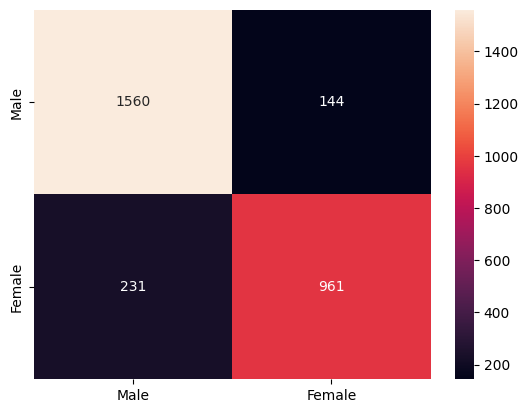

<Figure size 640x480 with 0 Axes>

In [36]:
plot_cm(y_test, y_pred)

## 4. Conclusion

In this analysis, we aimed to predict users' gender on the OKCupid dataset using four machine learning models: **Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM)**. After preprocessing the data by encoding categorical variables, standardizing numerical features, and performing hyperparameter tuning, we evaluated the models based on their validation and test scores.

- **Best Performing Model**: The **SVM** model achieved the highest test score of **0.8809**, indicating its strong ability to generalize.  
- **Efficiency vs. Performance Tradeoff**: While **Random Forest** and **SVM** provided competitive results, they took significantly longer to train compared to **Logistic Regression**, which performed nearly as well in just 21 seconds.  
- **Decision Tree Weakness**: The **Decision Tree** had the lowest test score (**0.8567**), likely due to its tendency to overfit.  

Overall, **SVM** provided the best results but at the cost of processing time, while **Logistic Regression** was a strong contender with much lower computational demand.

### 4.1. Next Steps for Further Analysis

1. **Feature Engineering & Selection**  
   - Explore new features that could enhance prediction accuracy, such as **profile text analysis (NLP techniques)**.  

2. **Ensemble Learning**  
   - Combine multiple models (e.g., **Stacking or Boosting**) to leverage their strengths and improve prediction robustness.  

3. **Deep Learning Approach**  
   - Implement a **Neural Network (MLP)** and compare its performance with traditional models.  

4. **Explainability & Bias Analysis**  
   - Investigate whether certain features disproportionately affect gender classification, ensuring the model is fair and interpretable.  